## LINEAR REGRESSION FROM SCRATCH 

### Iterative approach 

In [32]:
# Importing libaries 
import numpy as np 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error,  r2_score
import matplotlib.pyplot as plt 
import seaborn as sns 

In [33]:
# My class
class LinearReg():
    
    # constructor 
    def __init__(self, learning_rate = 0.0001, iterations = 1000):
        self.lr = learning_rate 
        self.epochs = iterations 
        self.weights = None
        self.b = 0
        
    # fit method 
    def fit(self, x_train, y_train):
        self.rows, self.columns = x_train.shape
        self.weights = np.zeros(self.columns)

        for i in range(self.epochs):
            self.update_weights(x_train, y_train)
        return self
        
    # helper method 
    def update_weights(self, x_train, y_train):
        y_pred = self.predict(x_train)
        # calculating the gradients 
        d_w = (-2 * x_train.T.dot(y_train - y_pred)) / self.rows
        d_b = (-2 * np.sum(y_train - y_pred)) / self.rows
        #  updating 
        self.weights -= self.lr * d_w
        self.b -= self.lr * d_b

    # predict function 
    def predict(self, x_test):
        return x_test.dot(self.weights) + self.b

In [34]:
# Driver code 

# Load the dataset 
df = pd.read_csv("income dataset.csv")
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

# split the dataset 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

# train the model 
lg = LinearReg()
lg.fit(x_train, y_train)

# make prediction 
prediction = lg.predict(x_test)

print(f"The weights are : \n{lg.weights}")
print(f"The intercept(b) is : {lg.b}")

The weights are : 
age            738.463722
experience    1404.034201
dtype: float64
The intercept(b) is : 347.4160292357878


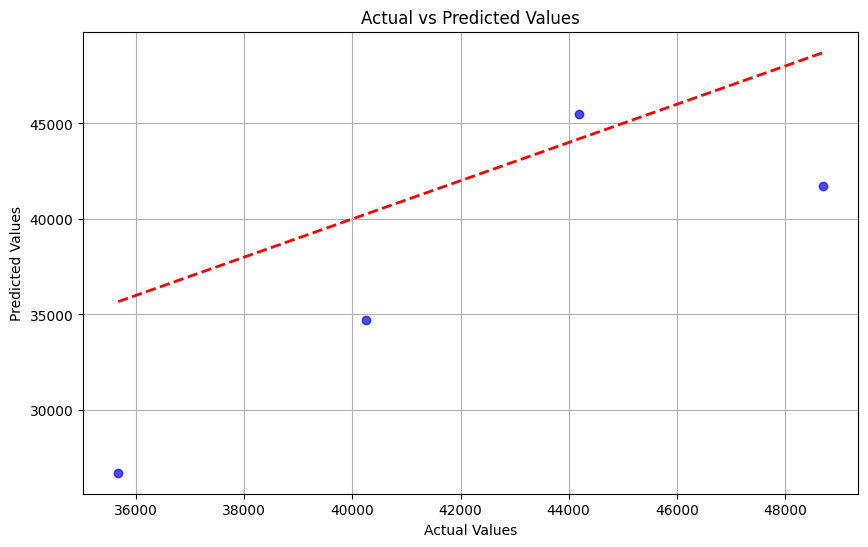

In [35]:
# plotting the actual vs predictions 
plt.figure(figsize=(10, 6))
plt.scatter(y_test, prediction, color='blue', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], # X-axis value range 
         [y_test.min(), y_test.max()], # Y-axis value range
         linestyle = '--', color = 'red', lw = 2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.grid(True)
plt.show()


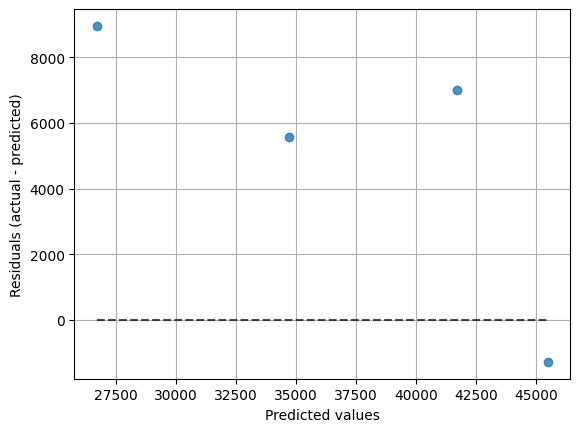

In [36]:
# Residuals Plot 
from sklearn.metrics import PredictionErrorDisplay

# Assuming y_test contains actual values and predictions contains predicted values
display = PredictionErrorDisplay(y_true=y_test, y_pred=prediction)
display.plot()
plt.grid(True)
plt.show()

In [37]:
# Accuracy of the model 
mae = mean_absolute_error(y_test, prediction)
mse = mean_squared_error(y_test, prediction)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, prediction)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R² Score: {r2}")


Mean Absolute Error (MAE): 5697.759200501575
Mean Squared Error (MSE): 40406720.617579065
Root Mean Squared Error (RMSE): 6356.62808551665
R² Score: -0.7444233200138068


#### Note :

If self.columns comes from a Pandas DataFrame, then np.zeros(self.columns) will inherit the index (column names) from Pandas, making self.weights a Pandas Series instead of a NumPy array.

What is pandas Series ???

= > It is basically a equivalent to a numpy array but with column name or index names.

To force a numpy array : 

self.weights = np.zeros(x_train.shape[1]) # # → array([0., 0.])